In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sts
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
from scipy.optimize import curve_fit

In [153]:
"""Reading manipulating file with country name
and returning a dataframe and transpose of the dataframe as return"""
def dataFrame(file_name, col, value1,countries):
    # Reading Data for dataframe
    df = pd.read_csv(file_name, skiprows = 4)
    # Grouping data with col value
    df1 = df.groupby(col, group_keys = True)
    #retriving the data with the all the group element
    df1 = df1.get_group(value1)
    #Reseting the index of the dataframe
    df1 = df1.reset_index()
    #Storing the column data in a variable
    a = df1['Country Name']
    # cropping the data from dataframe
    df1 = df1.iloc[countries,3:]
    df1 = df1.drop(columns=['Indicator Name', 'Indicator Code']) 
    df1.insert(loc=0, column='Country Name', value=a)
    #Dropping the NAN values from dataframe Column wise
    df1= df1.dropna(axis = 1)
    #transposing the index of the dataframe
    df2 = df1.set_index('Country Name').T
    #returning the normal dataframe and transposed dataframe
    return df1, df2

In [154]:
# years using for the data analysis
#years = 35
# countries which are using for data analysis
countries = [35, 55, 81, 109]
'''calling dataFrame functions for all the dataframe which will be used for visualization'''
GDP_capita_c, GDP_capita_y = dataFrame("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4770417.csv",
                                       "Indicator Name", "GDP per capita (current US$)",countries)

GDP_capita_c

,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,Canada,4121.932814,4520.162878,5089.587902,5838.660894,7033.011021,7511.211343,8809.264660,8919.057461,9123.691334,...,52669.089960,52635.17496,50955.998320,43596.135540,42315.603710,45129.429300,46548.638410,46328.671840,43258.263870,51987.939050
55,Germany,2761.166833,3192.133616,3809.981445,5046.755103,5639.077621,6236.358881,6634.856899,7682.953775,9482.042850,...,43855.854470,46298.92292,48023.869980,41103.256440,42136.120790,44652.589170,47939.278290,46793.686760,46772.825350,51203.554470
81,United Kingdom,2347.544318,2649.801514,3030.432514,3426.276221,3665.862798,4299.745618,4138.167788,4681.439932,5976.938169,...,42485.586070,43449.09172,47447.588930,45071.074320,41146.077360,40621.334480,43306.308300,42747.080460,40318.557570,46510.282780
109,India,111.968318,118.159798,122.612453,143.456125,163.231616,157.929385,161.137236,186.420135,206.073749,...,1434.018198,1438.05748,1559.864518,1590.173918,1714.280355,1957.968841,1974.377788,2047.232704,1910.421473,2256.590409


In [155]:

GDP_capita_y

Country Name,Canada,Germany,United Kingdom,India
1970,4121.932814,2761.166833,2347.544318,111.968318
1971,4520.162878,3192.133616,2649.801514,118.159798
1972,5089.587902,3809.981445,3030.432514,122.612453
1973,5838.660894,5046.755103,3426.276221,143.456125
1974,7033.011021,5639.077621,3665.862798,163.231616
1975,7511.211343,6236.358881,4299.745618,157.929385
1976,8809.264660,6634.856899,4138.167788,161.137236
1977,8919.057461,7682.953775,4681.439932,186.420135
1978,9123.691334,9482.042850,5976.938169,206.073749
1979,10043.660960,11281.023320,7804.762081,224.575438


In [156]:
x = GDP_capita_y.values #returns a numpy array
x

array([[ 4121.932814 ,  2761.166833 ,  2347.544318 ,   111.9683182],
       [ 4520.162878 ,  3192.133616 ,  2649.801514 ,   118.1597985],
       [ 5089.587902 ,  3809.981445 ,  3030.432514 ,   122.6124534],
       [ 5838.660894 ,  5046.755103 ,  3426.276221 ,   143.456125 ],
       [ 7033.011021 ,  5639.077621 ,  3665.862798 ,   163.2316156],
       [ 7511.211343 ,  6236.358881 ,  4299.745618 ,   157.929385 ],
       [ 8809.26466  ,  6634.856899 ,  4138.167788 ,   161.1372361],
       [ 8919.057461 ,  7682.953775 ,  4681.439932 ,   186.4201346],
       [ 9123.691334 ,  9482.04285  ,  5976.938169 ,   206.0737493],
       [10043.66096  , 11281.02332  ,  7804.762081 ,   224.5754377],
       [11170.56397  , 12138.3081   , 10032.06208  ,   267.3905787],
       [12337.46625  , 10209.07312  ,  9599.306222 ,   271.4250853],
       [12481.87479  ,  9913.737642 ,  9146.077357 ,   275.2654283],
       [13425.12249  ,  9864.34494  ,  8691.518813 ,   292.6448175],
       [13877.91708  ,  9313.16941

In [157]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)


In [158]:
normalized_df

,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,0.008203,0.008896,0.006286,0.002887
2,0.019932,0.021651,0.014201,0.004963
3,0.035362,0.047182,0.022433,0.014682
4,0.059964,0.059409,0.027415,0.023903
5,0.069814,0.071739,0.040597,0.021431
6,0.096552,0.079965,0.037237,0.022927
7,0.098814,0.101601,0.048534,0.034716
8,0.103029,0.138740,0.075474,0.043880
9,0.121979,0.175876,0.113484,0.052507


In [159]:
wcss = []
y=normalized_df.values

y

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00820295, 0.00889648, 0.00628552, 0.00288698],
       [0.01993227, 0.02165076, 0.01420085, 0.00496318],
       [0.03536207, 0.04718158, 0.02243254, 0.01468222],
       [0.05996393, 0.05940894, 0.02741481, 0.02390318],
       [0.06981415, 0.07173866, 0.04059658, 0.02143085],
       [0.09655214, 0.07996489, 0.03723652, 0.02292661],
       [0.09881371, 0.10160083, 0.04853402, 0.03471559],
       [0.10302887, 0.13873957, 0.07547428, 0.04387973],
       [0.12197889, 0.17587606, 0.11348439, 0.05250674],
       [0.14519143, 0.19357306, 0.15980173, 0.0724707 ],
       [0.1692279 , 0.15374771, 0.15080245, 0.07435192],
       [0.1722025 , 0.14765108, 0.14137743, 0.0761426 ],
       [0.19163202, 0.14663146, 0.13192475, 0.08424631],
       [0.20095892, 0.1352535 , 0.12127082, 0.07746254],
       [0.20583852, 0.13765635, 0.13110745, 0.08674318],
       [0.212971  , 0.22089465, 0.17184324, 0.0932992 ],
       [0.25103497, 0.28727618,

In [160]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)
    
wcss


C:\Users\Puneet\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[20.200858643556593,
 4.682662298671871,
 1.909744329644383,
 1.1868026968167553,
 0.93701783771897,
 0.722104552790815,
 0.5574113198917084,
 0.44522078411247,
 0.3838760429337339]

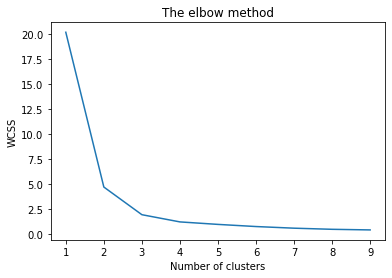

In [161]:
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [162]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(normalized_df)

In [163]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [164]:
lables = kmeans.fit_predict(normalized_df)
centroids= kmeans.cluster_centers_

In [165]:
centroids

array([[0.37999185, 0.47785647, 0.46793842, 0.13735976],
       [0.86546674, 0.84988252, 0.85431116, 0.64196567],
       [0.12015035, 0.11820788, 0.08987635, 0.04966138]])

In [166]:
'''normalized_df['lables']=lables
normalized_df
'''

"normalized_df['lables']=lables\nnormalized_df\n"

In [167]:
normalized_df.values[y_kmeans == 0, 1]

array([0.31315788, 0.30971243, 0.40342344, 0.42517704, 0.48876748,
       0.46986666, 0.50194553, 0.5965268 , 0.57232315, 0.499622  ,
       0.50633121, 0.49489253, 0.43213381, 0.43076243, 0.46315014,
       0.5687001 , 0.64706743])

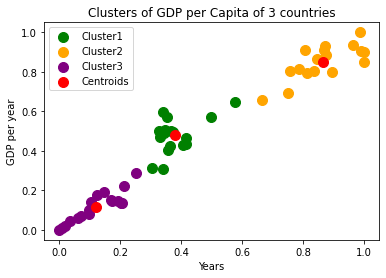

In [168]:
plt.figure()
plt.scatter(normalized_df.values[y_kmeans == 0, 0], normalized_df.values[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster1')
plt.scatter(normalized_df.values[lables == 1, 0], normalized_df.values[lables == 1, 1], s = 100, c = 'orange', label = 'Cluster2')
plt.scatter(normalized_df.values[lables == 2, 0], normalized_df.values[lables == 2, 1], s = 100, c = 'purple', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids')
plt.legend()
plt.title('Clusters of GDP per Capita of 3 countries')
plt.xlabel('Years')
plt.ylabel('GDP per year')
plt.show()


In [194]:
'''calling dataFrame functions for all the dataframe which will be used for visualization'''
school_c, school_y = dataFrame("API_19_DS2_en_csv_v2_4700503.csv",
                                       "Indicator Name", "School enrollment, primary and secondary (gross), gender parity index (GPI)",countries)
school_y['years'] = school_y.index

In [195]:
school_y

Country Name,Canada,Germany,United Kingdom,India,years
1999,1.00942,0.97897,1.00388,0.79697,1999
2000,1.01057,0.98250,1.00560,0.80224,2000
2007,0.98591,0.98008,1.01287,0.94256,2007
2008,0.98632,0.97805,1.00748,0.96705,2008
2009,0.98797,0.96033,1.00484,0.98997,2009
2010,0.98954,0.96125,0.99955,0.98905,2010
2011,0.99223,0.96001,1.00344,0.99853,2011
2012,1.00368,0.96137,0.99975,1.00340,2012
2013,1.00639,0.96446,1.02419,1.07250,2013
2014,1.00857,0.96531,1.02166,1.06962,2014


<AxesSubplot:>

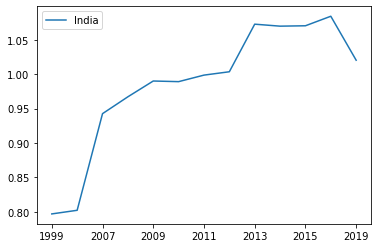

In [196]:
school_y.plot(y='India',use_index=True)

In [197]:
def exponential(t, n0, g):
    """Calculates exponential function with scale factor n0 and growth rate g."""
    t = t - 1960.0
    f = n0 * np.exp(g*t)
    return f

In [198]:
print(type(school_y["years"].iloc[1]))
school_y["years"] = pd.to_numeric(school_y["years"])
print(type(school_y["years"].iloc[1]))
param, covar = opt.curve_fit(exponential, school_y["years"], school_y["India"],
p0=(73233967692.102798, 0.03))

<class 'str'>
<class 'numpy.int64'>


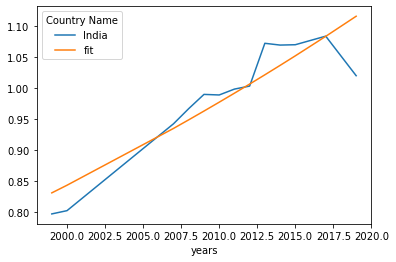

In [200]:
school_y["fit"] = exponential(school_y["years"], *param)
school_y.plot("years", ["India", "fit"])
plt.show()